In [55]:
# Read Accident data and obtain required fields
import pandas as pd
df = pd.read_csv("C:\\Users\\Navya\\Documents\\Python\\Accidents0515.csv")
#print(df)
#df.loc[:,["Longitude","Latitude"]]
df1 = df[["Longitude","Latitude"]] # Consider required columns
#df2 = df1[:1000]
df2 = df1.head(1000) # Consider top 1000 rows
print(df2)

     Longitude   Latitude
0    -0.191170  51.489096
1    -0.211708  51.520075
2    -0.206458  51.525301
3    -0.173862  51.482442
4    -0.156618  51.495752
5    -0.203238  51.515540
6    -0.211277  51.512695
7    -0.187623  51.502260
8    -0.167342  51.483420
9    -0.206531  51.512443
10   -0.182872  51.494902
11   -0.184312  51.484044
12   -0.192366  51.491632
13   -0.157753  51.492622
14   -0.176224  51.495429
15   -0.180220  51.481912
16   -0.205139  51.500191
17   -0.171887  51.495811
18   -0.160590  51.486552
19   -0.174925  51.495498
20   -0.187270  51.492992
21   -0.204346  51.513039
22   -0.173445  51.482076
23   -0.167824  51.492960
24   -0.166322  51.498062
25   -0.215629  51.508265
26   -0.207623  51.513988
27   -0.192771  51.488671
28   -0.182872  51.494902
29   -0.160606  51.496893
..         ...        ...
970  -0.103029  51.516479
971  -0.087153  51.510107
972  -0.084450  51.509253
973  -0.072706  51.510949
974  -0.088731  51.517147
975  -0.084281  51.513297
976  -0.0797

In [56]:
# Load K-Means model
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
# Extract labels and cluster centroids
labels = kmeans.predict(df2)
cluster_centroids = kmeans.cluster_centers_
print(cluster_centroids)

[[-0.17323398 51.49023857]
 [-0.09149913 51.51416438]
 [-0.20444511 51.50792628]]


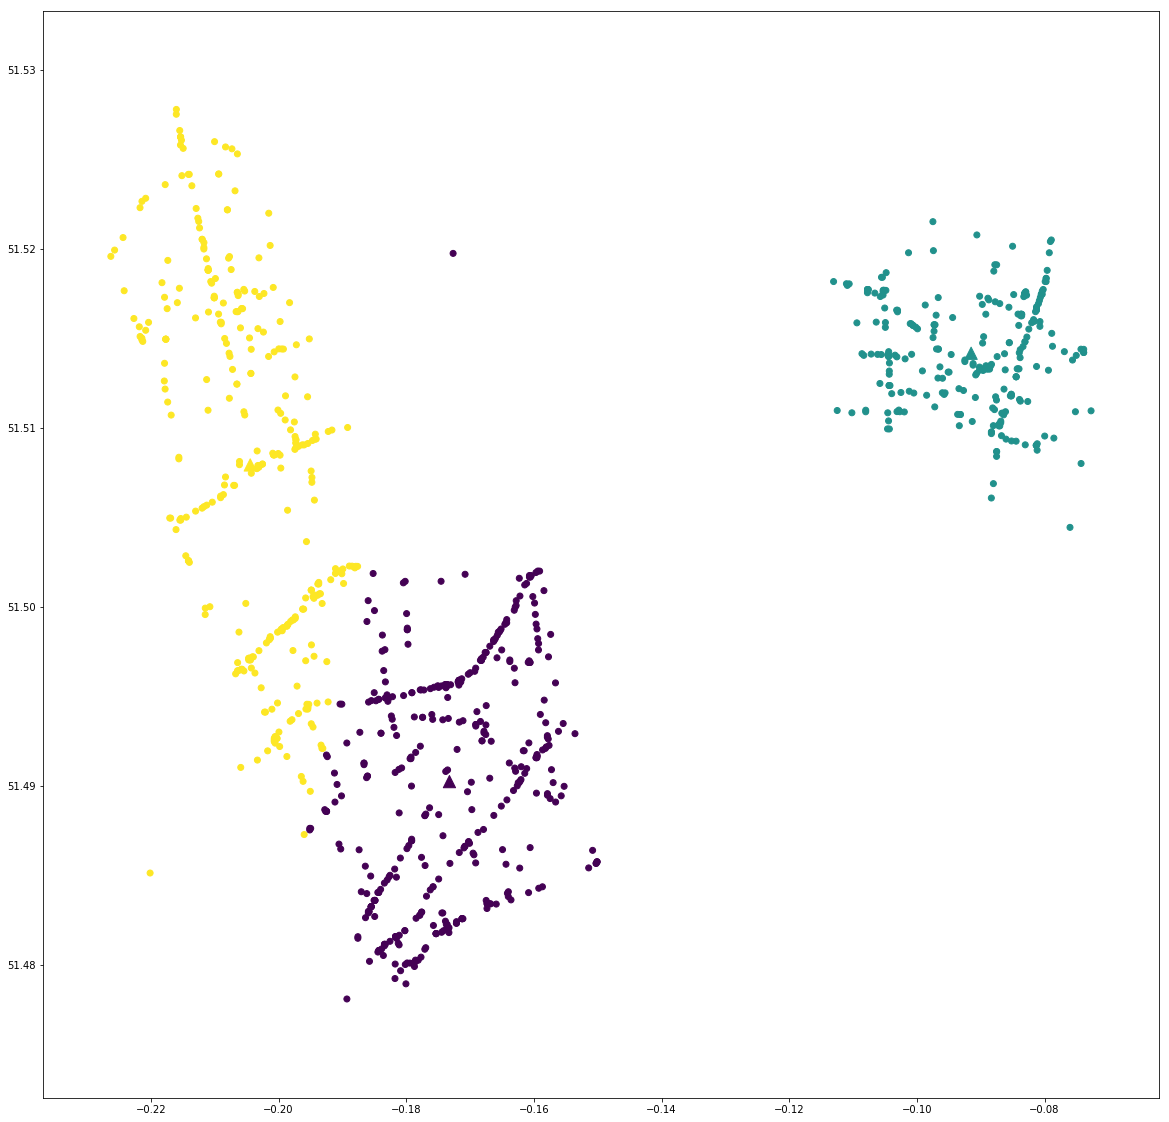

In [60]:
# Plot clusters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'''fig = plt.figure(figsize=(10,10))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = map(lambda Longitude: colmap[Longitude+1],label)
colors1 = list(colors)
plt.scatter(df2["Longitude"],df2["Latitude"],color = colors1, alpha = 0.5,edgecolor="k")
for idx, centroid in enumerate(cluster_centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()'''

fig = plt.figure(figsize=(20,20))
plt.scatter(df2["Longitude"],df2["Latitude"],c=labels.astype(np.float))
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1],c=np.arange(k), marker="^", s =150)
plt.show()